<a href="https://colab.research.google.com/github/leejunho12316/HonGongMachine/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_9_2_%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9C%BC%EB%A1%9C_IMDB_%EB%A6%AC%EB%B7%B0_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 다운&정제

In [5]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

num_words=100
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=num_words)

print("데이터 shape: ",train_input.shape, test_input.shape)
print(train_input[0:2])
print(train_target[0:2]) #0 부정 1 긍정

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

데이터 shape:  (25000,) (25000,)
[list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 2, 36, 2, 5, 25, 2, 43, 2, 2, 50, 2, 2, 9, 35, 2, 2, 5, 2, 4, 2, 2, 2, 2, 2, 2, 39, 4, 2, 2, 2, 17, 2, 38, 13, 2, 4, 2, 50, 16, 6, 2, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 2, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 2, 12, 16, 38, 2, 5, 25, 2, 51, 36, 2, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 2, 2, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 2, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 2, 6, 2, 2, 18, 4, 2, 22, 21, 2, 2, 26, 2, 5, 2, 30, 2, 18, 51, 36, 28, 2, 92, 25, 2, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 2, 2, 32, 15, 16, 2, 19, 2, 32])
 list([1, 2, 2, 2, 2, 78, 2, 5, 6, 2, 2, 2, 2, 26, 4, 2, 8, 2, 2, 14, 2, 20, 13, 2, 2, 2, 2, 5, 2, 2, 2, 21, 14, 69, 2, 8, 30, 23, 7, 4, 2, 2, 93, 4, 2, 9, 2, 2, 5, 2, 4, 2, 9, 35, 2, 4, 2, 9, 2, 2, 4, 2, 9, 4, 2, 

데이터 길이 맞추기

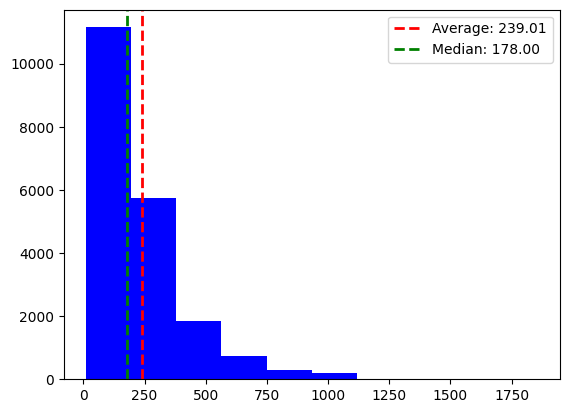

In [6]:
import matplotlib.pyplot as plt
import numpy as np
lengths = [len(sentence) for sentence in train_input]

avg = np.mean(lengths)
med = np.median(lengths)

plt.hist(lengths, color = 'blue')
plt.axvline(avg, color='red', linestyle='dashed', linewidth=2, label=f'Average: {avg:.2f}')
plt.axvline(med, color='green', linestyle='dashed', linewidth=2, label=f'Median: {med:.2f}')
plt.legend()
plt.show()

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

print(train_seq.shape, val_seq.shape)

(20000, 100) (5000, 100)


원-핫 인코딩

In [9]:
from tensorflow import keras

train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)
print("train_oh shape : ", train_oh.shape) #100 길이의 시퀀스. num_words 단어 중 하나. 총 20000개
print("val_oh shape : ", val_oh.shape) #100길이의 시퀀스, num_words 단어 중 하나, 총 5000개

train_oh shape :  (20000, 100, 100)
val_oh shape :  (5000, 100, 100)


#순환 신경망

In [10]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, activation='tanh', input_shape = (100, num_words)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best_simplernn_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size = 64, verbose =0,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb,early_stopping_cb])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5140 - loss: 0.6961

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5140 - loss: 0.6961 - val_accuracy: 0.5308 - val_loss: 0.6927
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5301 - loss: 0.6922

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5301 - loss: 0.6922 - val_accuracy: 0.5488 - val_loss: 0.6878
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5488 - loss: 0.6858

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5488 - loss: 0.6858 - val_accuracy: 0.5718 - val_loss: 0.6789
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5833 - loss: 0.6733

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5833 - loss: 0.6733 - val_accuracy: 0.6120 - val_loss: 0.6615
Epoch 5/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6163 - loss: 0.6559

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6164 - loss: 0.6559 - val_accuracy: 0.6196 - val_loss: 0.6558
Epoch 6/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6287 - loss: 0.6478

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6287 - loss: 0.6478 - val_accuracy: 0.6232 - val_loss: 0.6508
Epoch 7/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6380 - loss: 0.6411

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6380 - loss: 0.6411 - val_accuracy: 0.6334 - val_loss: 0.6441
Epoch 8/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6426 - loss: 0.6362

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6426 - loss: 0.6362 - val_accuracy: 0.6342 - val_loss: 0.6416
Epoch 9/100
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6489 - loss: 0.6311

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6489 - loss: 0.6311 - val_accuracy: 0.6402 - val_loss: 0.6373
Epoch 10/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6517 - loss: 0.6287

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6517 - loss: 0.6287 - val_accuracy: 0.6466 - val_loss: 0.6313
Epoch 11/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6554 - loss: 0.6242

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6554 - loss: 0.6242 - val_accuracy: 0.6490 - val_loss: 0.6281
Epoch 12/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6584 - loss: 0.6208

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6584 - loss: 0.6208 - val_accuracy: 0.6542 - val_loss: 0.6291
Epoch 13/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6614 - loss: 0.6175

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6615 - loss: 0.6175 - val_accuracy: 0.6580 - val_loss: 0.6219
Epoch 14/100
308/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6679 - loss: 0.6133

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6679 - loss: 0.6133 - val_accuracy: 0.6580 - val_loss: 0.6209
Epoch 15/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6716 - loss: 0.6125 

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6716 - loss: 0.6125 - val_accuracy: 0.6652 - val_loss: 0.6150
Epoch 16/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6711 - loss: 0.6091

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6711 - loss: 0.6090 - val_accuracy: 0.6704 - val_loss: 0.6110
Epoch 17/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6774 - loss: 0.6030

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6774 - loss: 0.6030 - val_accuracy: 0.6688 - val_loss: 0.6068
Epoch 18/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6714 - loss: 0.6061

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6715 - loss: 0.6060 - val_accuracy: 0.6762 - val_loss: 0.6083
Epoch 19/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6760 - loss: 0.6033

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6760 - loss: 0.6033 - val_accuracy: 0.6764 - val_loss: 0.6017
Epoch 20/100
308/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6782 - loss: 0.5978

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6782 - loss: 0.5978 - val_accuracy: 0.6796 - val_loss: 0.5995
Epoch 21/100
307/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6883 - loss: 0.5931

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6882 - loss: 0.5931 - val_accuracy: 0.6794 - val_loss: 0.5994
Epoch 22/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6871 - loss: 0.5946

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6871 - loss: 0.5946 - val_accuracy: 0.6812 - val_loss: 0.5958
Epoch 23/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6864 - loss: 0.5943

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6864 - loss: 0.5943 - val_accuracy: 0.6850 - val_loss: 0.5960
Epoch 24/100
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6858 - loss: 0.5927

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6859 - loss: 0.5927 - val_accuracy: 0.6848 - val_loss: 0.5935
Epoch 25/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6876 - loss: 0.5902

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6876 - loss: 0.5902 - val_accuracy: 0.6868 - val_loss: 0.5916
Epoch 26/100
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6852 - loss: 0.5918

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6852 - loss: 0.5917 - val_accuracy: 0.6868 - val_loss: 0.5906
Epoch 27/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6900 - loss: 0.5859

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6900 - loss: 0.5859 - val_accuracy: 0.6914 - val_loss: 0.5903
Epoch 28/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6939 - loss: 0.5861

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6939 - loss: 0.5861 - val_accuracy: 0.6908 - val_loss: 0.5885
Epoch 29/100
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6961 - loss: 0.5823

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6960 - loss: 0.5823 - val_accuracy: 0.6940 - val_loss: 0.5904
Epoch 30/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6957 - loss: 0.5821

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6957 - loss: 0.5822 - val_accuracy: 0.6926 - val_loss: 0.5867
Epoch 31/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6953 - loss: 0.5799

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6952 - loss: 0.5799 - val_accuracy: 0.6954 - val_loss: 0.5871
Epoch 32/100
308/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6969 - loss: 0.5804

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6967 - loss: 0.5804 - val_accuracy: 0.6942 - val_loss: 0.5865
Epoch 33/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6956 - loss: 0.5810

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6956 - loss: 0.5810 - val_accuracy: 0.6978 - val_loss: 0.5854
Epoch 34/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6923 - loss: 0.5827

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6923 - loss: 0.5827 - val_accuracy: 0.6856 - val_loss: 0.5936
Epoch 35/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6877 - loss: 0.5878

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6877 - loss: 0.5877 - val_accuracy: 0.6988 - val_loss: 0.5840
Epoch 36/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6929 - loss: 0.5830

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6929 - loss: 0.5830 - val_accuracy: 0.6972 - val_loss: 0.5839
Epoch 37/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6991 - loss: 0.5753

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6991 - loss: 0.5754 - val_accuracy: 0.6952 - val_loss: 0.5837
Epoch 38/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6964 - loss: 0.5795

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6964 - loss: 0.5795 - val_accuracy: 0.6960 - val_loss: 0.5830
Epoch 39/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6961 - loss: 0.5796

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6961 - loss: 0.5796 - val_accuracy: 0.7000 - val_loss: 0.5828
Epoch 40/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6947 - loss: 0.5799

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6947 - loss: 0.5799 - val_accuracy: 0.6988 - val_loss: 0.5823
Epoch 41/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6994 - loss: 0.5726

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6993 - loss: 0.5726 - val_accuracy: 0.7010 - val_loss: 0.5821
Epoch 42/100
307/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6997 - loss: 0.5757

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6996 - loss: 0.5758 - val_accuracy: 0.7002 - val_loss: 0.5815
Epoch 43/100
307/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6884 - loss: 0.5869

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6886 - loss: 0.5867 - val_accuracy: 0.6994 - val_loss: 0.5832
Epoch 44/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7001 - loss: 0.5743

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7001 - loss: 0.5743 - val_accuracy: 0.6992 - val_loss: 0.5810
Epoch 45/100
308/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6939 - loss: 0.5797

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6939 - loss: 0.5796 - val_accuracy: 0.6986 - val_loss: 0.5810
Epoch 46/100
307/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6983 - loss: 0.5762

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6983 - loss: 0.5762 - val_accuracy: 0.6938 - val_loss: 0.5848
Epoch 47/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6909 - loss: 0.5838

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6910 - loss: 0.5837 - val_accuracy: 0.6986 - val_loss: 0.5806
Epoch 48/100
308/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7055 - loss: 0.5700

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7054 - loss: 0.5701 - val_accuracy: 0.6970 - val_loss: 0.5820
Epoch 49/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6966 - loss: 0.5749

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6966 - loss: 0.5749 - val_accuracy: 0.7008 - val_loss: 0.5804
Epoch 50/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6979 - loss: 0.5778

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6979 - loss: 0.5778 - val_accuracy: 0.6996 - val_loss: 0.5822
Epoch 51/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7024 - loss: 0.5707

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7024 - loss: 0.5707 - val_accuracy: 0.6946 - val_loss: 0.5806
Epoch 52/100
307/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6993 - loss: 0.5747

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6993 - loss: 0.5747 - val_accuracy: 0.7002 - val_loss: 0.5796
Epoch 53/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6989 - loss: 0.5746

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6989 - loss: 0.5746 - val_accuracy: 0.6990 - val_loss: 0.5828
Epoch 54/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6987 - loss: 0.5746

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6987 - loss: 0.5746 - val_accuracy: 0.7014 - val_loss: 0.5791
Epoch 55/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6975 - loss: 0.5745

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6975 - loss: 0.5745 - val_accuracy: 0.6980 - val_loss: 0.5791
Epoch 56/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6957 - loss: 0.5787

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6957 - loss: 0.5787 - val_accuracy: 0.7012 - val_loss: 0.5786
Epoch 57/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6982 - loss: 0.5737

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6982 - loss: 0.5737 - val_accuracy: 0.7010 - val_loss: 0.5784
Epoch 58/100
307/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6954 - loss: 0.5724

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6955 - loss: 0.5724 - val_accuracy: 0.6940 - val_loss: 0.5835
Epoch 59/100
307/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6981 - loss: 0.5729

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6981 - loss: 0.5729 - val_accuracy: 0.7018 - val_loss: 0.5782
Epoch 60/100
307/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7013 - loss: 0.5729

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7012 - loss: 0.5730 - val_accuracy: 0.6972 - val_loss: 0.5800
Epoch 61/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6991 - loss: 0.5719

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6991 - loss: 0.5719 - val_accuracy: 0.7026 - val_loss: 0.5779
Epoch 62/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7007 - loss: 0.5742

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7007 - loss: 0.5742 - val_accuracy: 0.6968 - val_loss: 0.5811
Epoch 63/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6995 - loss: 0.5735

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6995 - loss: 0.5735 - val_accuracy: 0.7018 - val_loss: 0.5781
Epoch 64/100
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6983 - loss: 0.5726

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6983 - loss: 0.5726 - val_accuracy: 0.7014 - val_loss: 0.5777
Epoch 65/100
308/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6979 - loss: 0.5772

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6980 - loss: 0.5771 - val_accuracy: 0.6950 - val_loss: 0.5810
Epoch 66/100
307/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6940 - loss: 0.5727

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6941 - loss: 0.5727 - val_accuracy: 0.6996 - val_loss: 0.5784
Epoch 67/100
308/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6990 - loss: 0.5696

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6990 - loss: 0.5697 - val_accuracy: 0.6954 - val_loss: 0.5793


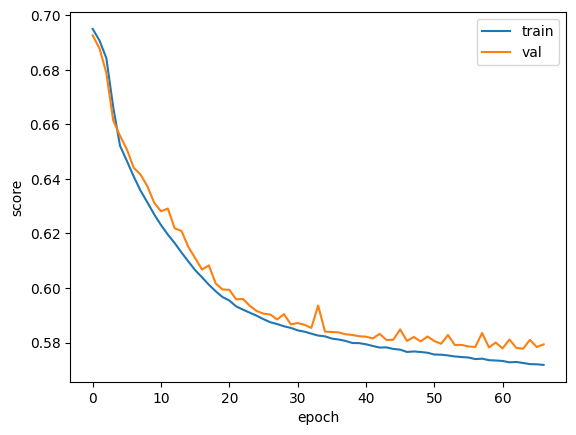

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend(['train','val'])
plt.show()

In [42]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)             │ (None, 8)                   │           2,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,481 (9.69 KB)

 Trainable params: 2,481 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

#단어 임베딩

In [17]:
train_seq.shape

(20000, 100)

In [19]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(num_words, 16, input_length = 100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))
model2.summary()

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best_embedding_model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
          validation_data=(val_seq, val_target),
          callbacks=[checkpoint_cb, early_stopping_cb])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_6 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5001 - loss: 0.6976

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.5001 - loss: 0.6976 - val_accuracy: 0.5928 - val_loss: 0.6761
Epoch 2/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5998 - loss: 0.6728

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.5998 - loss: 0.6727 - val_accuracy: 0.6252 - val_loss: 0.6598
Epoch 3/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6362 - loss: 0.6559

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.6362 - loss: 0.6559 - val_accuracy: 0.6246 - val_loss: 0.6571
Epoch 4/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6540 - loss: 0.6434

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.6540 - loss: 0.6434 - val_accuracy: 0.6604 - val_loss: 0.6360
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6656 - loss: 0.6325

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6656 - loss: 0.6325 - val_accuracy: 0.6672 - val_loss: 0.6296
Epoch 6/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6708 - loss: 0.6267

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.6708 - loss: 0.6266 - val_accuracy: 0.6716 - val_loss: 0.6207
Epoch 7/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6751 - loss: 0.6173

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.6751 - loss: 0.6173 - val_accuracy: 0.6770 - val_loss: 0.6116
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.6767 - loss: 0.6126 - val_accuracy: 0.6694 - val_loss: 0.6129
Epoch 9/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6766 - loss: 0.6097

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.6766 - loss: 0.6097 - val_accuracy: 0.6840 - val_loss: 0.6018
Epoch 10/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6819 - loss: 0.6059 - val_accuracy: 0.6676 - val_loss: 0.6169
Epoch 11/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6949 - loss: 0.5944

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6949 - loss: 0.5944 - val_accuracy: 0.6790 - val_loss: 0.5996
Epoch 12/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.6869 - loss: 0.5981 - val_accuracy: 0.6854 - val_loss: 0.6009
Epoch 13/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6911 - loss: 0.5927 - val_accuracy: 0.6666 - val_loss: 0.6143
Epoch 14/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6936 - loss: 0.5904

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.6936 - loss: 0.5904 - val_accuracy: 0.6890 - val_loss: 0.5935
Epoch 15/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6963 - loss: 0.5870

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6963 - loss: 0.5870 - val_accuracy: 0.6852 - val_loss: 0.5905
Epoch 16/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6913 - loss: 0.5885 - val_accuracy: 0.6852 - val_loss: 0.5912
Epoch 17/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7022 - loss: 0.5822 - val_accuracy: 0.6652 - val_loss: 0.6150
Epoch 18/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7041 - loss: 0.5762 - val_accuracy: 0.6492 - val_loss: 0.6324


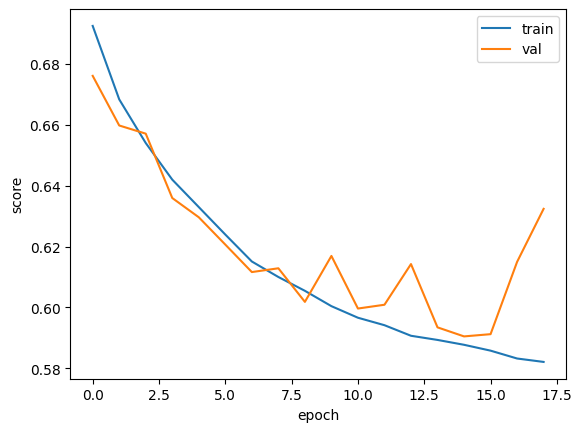

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend(['train','val'])
plt.show()